In [1]:
# letterdata.csv
# Location https://mitu

In [4]:
#Import the library

In [35]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [11]:
df=pd.read_csv('letterdata.csv')

In [12]:
df.shape

(20000, 17)

In [13]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


### Seprate the input and Output

In [17]:
x = df.drop('letter', axis =1)

y = df['letter']

In [25]:
y.value_counts()

letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='letter'>

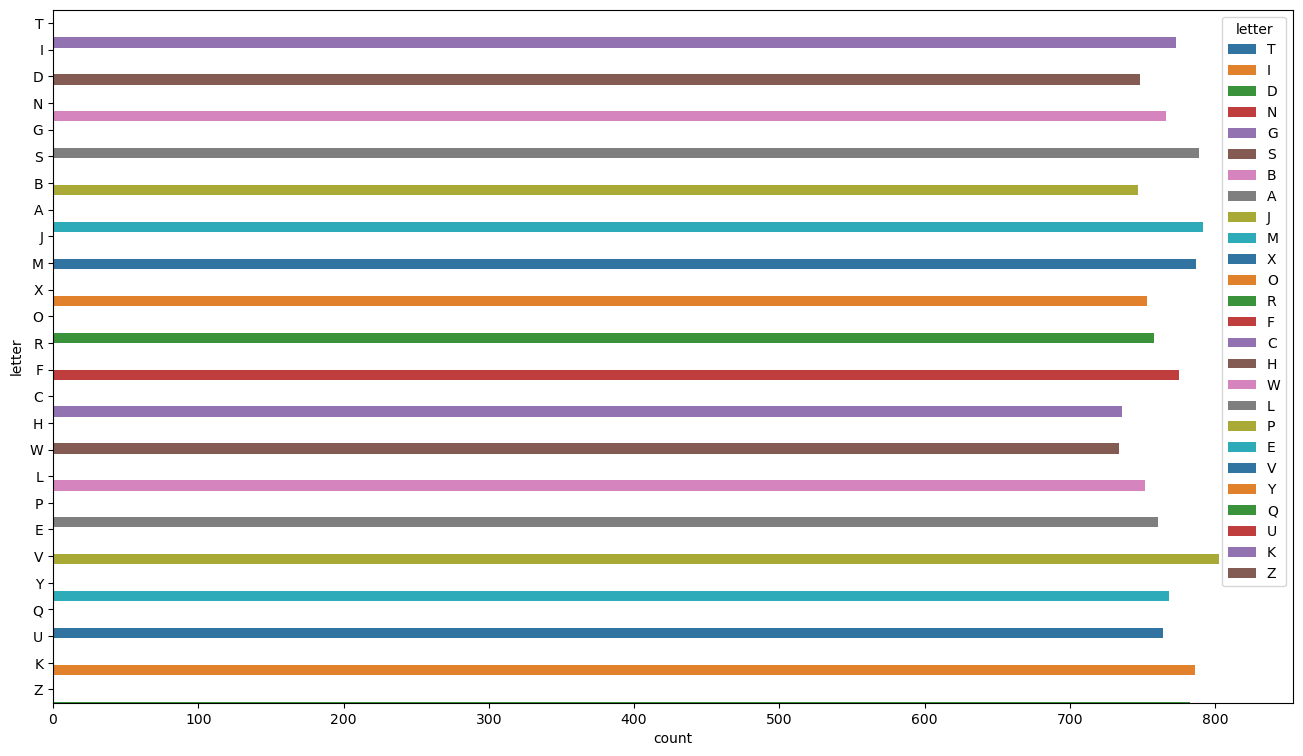

In [28]:
plt.figure(figsize=(16, 9))
sns.countplot(y=y, palette='tab10', hue =y, width=10)

In [29]:
###Cross validation

In [30]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, stratify=y, test_size=0.20)
x_train.shape, t_test.shape

((16000, 16), (4000, 16))

In [62]:
# Build the Model

In [63]:
from sklearn.svm import SVC

In [64]:
svc=SVC(kernel='linear',random_state=0)

In [65]:
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [66]:
#### Performance Evaluation

In [67]:
y_pred=svc.predict(x_test)

In [75]:
y_pred

array(['A', 'H', 'S', ..., 'L', 'R', 'L'], dtype=object)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

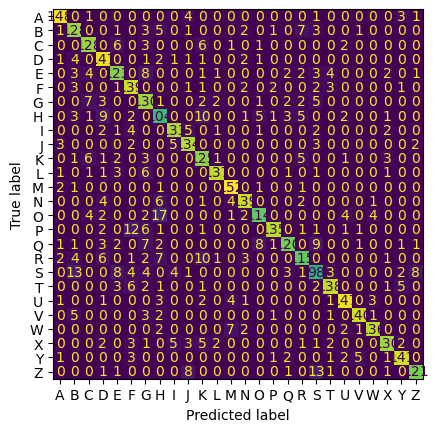

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,colorbar=False)

In [77]:
accuracy_score(y_test,y_pred)

0.8505

In [69]:
y_pred=svc.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred)

0.8505

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.92      0.94      0.93       158
           B       0.77      0.84      0.80       153
           C       0.84      0.87      0.86       147
           D       0.80      0.91      0.85       161
           E       0.81      0.80      0.81       154
           F       0.79      0.90      0.84       155
           G       0.72      0.84      0.77       155
           H       0.68      0.71      0.69       147
           I       0.90      0.88      0.89       151
           J       0.85      0.90      0.87       149
           K       0.75      0.84      0.80       148
           L       0.94      0.90      0.92       152
           M       0.90      0.96      0.93       158
           N       0.90      0.89      0.89       157
           O       0.86      0.76      0.81       150
           P       0.95      0.84      0.89       161
           Q       0.90      0.76      0.82       157
           R       0.81    

In [80]:
svc=SVC(kernel='poly', random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='poly', random_state=0)

In [81]:
new=x_test.iloc[[34,675,123,2045,3567],:]

In [82]:
new

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
6242,2,3,4,2,2,8,8,4,4,8,5,7,2,7,4,10
2211,2,7,4,5,3,12,3,2,2,9,2,9,3,7,3,9
14363,7,11,6,6,3,6,10,2,6,11,7,5,2,9,6,5
9494,2,9,3,7,1,15,2,6,5,14,1,9,0,7,0,8
4121,2,1,2,1,1,5,11,7,1,9,6,4,1,9,3,8


In [83]:
svc.predict(new)

array(['R', 'A', 'F', 'J', 'P'], dtype=object)

In [79]:
y_test.iloc[[34,675,123,2045,332,3567]].values

array(['R', 'A', 'F', 'J', 'Y', 'P'], dtype=object)

In [84]:
x= np.arange(1,100)

In [89]:
y=np.arange(1,100)

In [90]:
x.mean()

50.0

In [91]:
y.mean()

50.0